In [3]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
!pip install langchain_community

  Using cached aiohttp-3.11.18-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached propcache-0.3.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached yarl-1.20.0-cp311-cp311-win_amd64.whl.metadata (74 kB)
  Using cached langchain_text_splitters-0.3.8-py3-none-any.whl.metadata (1.9 kB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.5 MB 1.9 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.5 MB 1.6 MB/s eta 0:00:02
   ---------------- ----------------------- 1.0/2.5 MB 1.6 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.5 MB 1.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.8/2.5 MB 1.5 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.5 MB 1.5 MB/s eta 0:00:01
   ------------------------------------- -- 2.4/2.5 MB 1.5 MB/s eta 0:00:01
   ---------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gql 3.5.0 requires backoff<3.0,>=1.11.1, which is not installed.


In [5]:
!pip install arxiv

  Using cached arxiv-2.2.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached feedparser-6.0.11-py3-none-any.whl.metadata (2.4 kB)
  Using cached sgmllib3k-1.0.0.tar.gz (5.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using cached arxiv-2.2.0-py3-none-any.whl (11 kB)
Using cached feedparser-6.0.11-py3-none-any.whl (81 kB)
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6105 sha256=cc4940390ce5666678be5124c7bdbe1a810af441a8dadced6dba3506c3896c1b
  Stored in directory: c:\users\malah\appdata\local\pip\cache\wheels\3b\25\2a\105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k

   ------------- -------------------------- 1/3 [feedparser]
   ---------------------------------------- 3/3 [arxiv]



  DEPRECATION: Building 'sgmllib3k' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'sgmllib3k'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [6]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [7]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [9]:
!pip install wikipedia

  Using cached wikipedia-1.4.0-py3-none-any.whl


In [10]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [12]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [13]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [14]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'AI News | Latest AI News, Analysis & Events',
  'url': 'https://www.artificialintelligence-news.com/',
  'content': 'AI News reports on the latest artificial intelligence news and insights. Explore industry trends from the frontline of AI.',
  'score': 0.650934},
 {'title': 'Artificial Intelligence - Latest AI News and Analysis - WSJ.com',
  'url': 'https://www.wsj.com/tech/ai',
  'content': 'The latest artificial intelligence news coverage focusing on the technology, tools and the companies building AI technology.',
  'score': 0.6383174},
 {'title': 'Latest AI news and blog posts - Google AI',
  'url': 'https://ai.google/latest-news/',
  'content': 'Read about the latest AI news and explore blogs for researchers, IT leaders, developers, and more.',
  'score': 0.6364215},
 {'title': 'Artificial intelligence - NBC News',
  'url': 'https://www.nbcnews.com/artificial-intelligence',
  'content': "The latest news and top stories on artificial intelligence, including AI chatbots 

In [15]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [17]:
!pip install langchain_groq


   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 2/2 [langchain_groq]



In [18]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")


In [19]:
llm.invoke("What is AI")

AIMessage(content='\n<think>\nOkay, the user is asking "What is AI?" so I need to explain AI in a clear way. Let me start with a simple definition. AI stands for Artificial Intelligence. I should mention that it\'s a branch of computer science. Maybe also note that it\'s about making machines smart.\n\nI should break down the key concepts. Like, AI systems can perform tasks that typically require human intelligence. What are those tasks? Examples like problem-solving, learning, reasoning, perception, language understanding. Maybe list some common applications people know, like voice assistants, recommendation systems, image recognition.\n\nIt\'s important to differentiate between narrow AI and general AI. Narrow AI is what we have now, like Siri or Alexa, doing specific tasks. General AI would be human-level intelligence across various tasks, which we don\'t have yet. Mention that it\'s still theoretical.\n\nAlso, talk about how AI works. Machine learning and neural networks are key co

In [20]:
llm_with_tools=llm.bind_tools(tools=tools)

In [21]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_b3ke', 'function': {'arguments': '{"query": "recent advancements and news in artificial intelligence"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 197, 'prompt_tokens': 356, 'total_tokens': 553, 'completion_time': 0.489631142, 'prompt_time': 0.032016199, 'queue_time': 0.24325918100000002, 'total_time': 0.521647341}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8ea96284-e109-48bd-9bbf-1d77a1ae8dfd-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent advancements and news in artificial intelligence'}, 'id': 'call_b3ke', 'type': 'tool_call'}], usage_metadata={'input_tokens': 356, 'output_tokens': 197, 'total_tokens': 553})

In [22]:
## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_hyqb', 'function': {'arguments': '{"query": "quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 250, 'prompt_tokens': 357, 'total_tokens': 607, 'completion_time': 0.578735023, 'prompt_time': 0.043762289, 'queue_time': 0.941199637, 'total_time': 0.622497312}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_28178d7ff6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f51de772-5ba7-4891-afdb-39df67b96f35-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'call_hyqb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 357, 'output_tokens': 250, 'total_tokens': 607})

In [23]:
## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_y5cm', 'function': {'arguments': '{"query": "machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 158, 'prompt_tokens': 353, 'total_tokens': 511, 'completion_time': 0.391971294, 'prompt_time': 0.023789963, 'queue_time': 0.24684857699999999, 'total_time': 0.415761257}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--249fac4b-b3ce-451c-bb77-1306ff0726a3-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'machine learning'}, 'id': 'call_y5cm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 353, 'output_tokens': 158, 'total_tokens': 511})

## Workflow 

In [24]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [25]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [26]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

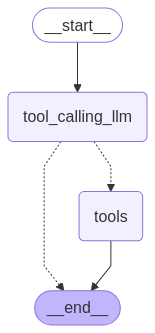

In [27]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [28]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_pz53)
 Call ID: call_pz53
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [29]:
messages=graph.invoke({"messages":"Hi My name is Harish"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi My name is Harish
================================== Ai Message ==================================

Hello Harish! Nice to meet you. I'm Qwen, a large language model developed by Alibaba Cloud. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊


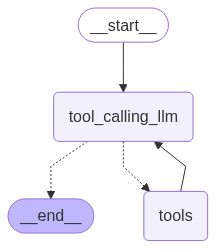

In [30]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_3yb7)
 Call ID: call_3yb7
  Args:
    query: latest advances in AI technology 2024
  arxiv (call_czr4)
 Call ID: call_czr4
  Args:
    query: quantum computing recent research papers 2024
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The Top 9 AI Breakthroughs of 2024 (You Won't Believe Are Real)", "url": "https://www.youtube.com/watch?v=Mv0uFYV9ZCM&pp=0gcJCdgAo7VqN5tD", "content": "Are you ready to be amazed by the incredible advancements in artificial intelligence? In 2024, AI has reached unprecedented heights, showcasing breakthroughs that are revolutionizing industries and reshaping our everyday liv